### Empezamos a trabajar aquí

In [3]:
!python -m pip install astroquery spiceypy &>/dev/null
!wget https://naif.jpl.nasa.gov/pub/naif/generic_kernels/lsk/naif0012.tls &>/dev/null

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import spiceypy as spy
from astroquery.jplhorizons import Horizons
from urllib import request
import json
from collections import OrderedDict as odict

ModuleNotFoundError: No module named 'spiceypy'

In [ ]:
spy.furnsh('naif0012.tls')

In [5]:
html=request.urlopen(f"https://ssd-api.jpl.nasa.gov/sbdb.api?sstr=2005ed224&cov=mat")
json_data=json.loads(html.read().decode())
json_data

NameError: name 'request' is not defined

In [6]:
rad=180/np.pi
deg=1/rad
AU=149597870.693 #km 
mu=132712440023.310 #km^3/s^2

In [7]:
Cov=np.array(json_data["orbit"]["covariance"]["data"],dtype=float)
Cov_label=json_data["orbit"]["covariance"]["labels"]
t=float(json_data["orbit"]["epoch"])
mu=132712440023.310 #km^3/s^2
Cov,Cov_label

NameError: name 'json_data' is not defined

In [8]:
nlen=len(json_data["orbit"]["elements"])
elnames=[]
elements=odict()
for i in range(nlen):
  element=json_data["orbit"]["elements"][i]
  elements[element["name"]]=odict()
  for prop in element.keys():
    try:
      elements[element["name"]][prop]=float(element[prop])
    except:
      pass

for elname in elements.keys():
  element=elements[elname]
  print(f"Elemento {elname} = {element['value']} +/- {element['sigma']**2}")

means=[elements['e']['value'],elements['q']['value'],elements['tp']['value'],elements['om']['value'],elements['w']['value'],elements['i']['value']]
means

NameError: name 'json_data' is not defined

### Idea 1: Hacer la Gaussiana Multivariada y con los valores obtenidos hallar M.


In [9]:
data=np.random.multivariate_normal(means,Cov,1000)

NameError: name 'means' is not defined

In [10]:
e=data[:,0];q=data[:,1];tp=data[:,2];node=data[:,3];peri=data[:,4];inc=data[:,5]

t0=float(json_data["orbit"]["epoch"])
et0=spy.unitim(t0,"JDTDB","ET")

a=(q/(1-e))*AU
n=np.sqrt(mu/a**3)
#n=np.rad2deg(n)
#n*86400
tps=np.array([spy.unitim(t,"JDTDB","ET") for t in tp])
M=n*(t-tps)
Ms=np.mod(M,2*np.pi)

et=spy.str2et("2023-03-11.35 UTC")

Asteroid=[]
for i in range(len(e)):
  Asteroid.append(spy.conics([q[i]*AU,e[i],inc[i]*deg,node[i]*deg,peri[i]*deg,Ms[i],et0,mu],e))
Asteroid=np.array(Asteroid)
#print(f"e ={e}\nq={q}\ntp={tp}\nnode={node}\nperi={peri}\nM={Ms}\ni={inc}")
et0, et

NameError: name 'data' is not defined

In [11]:
Epoch=spy.unitim(et,"ET","JDTDB")
data_tierra=Horizons(id="399",location="@10",epochs=Epoch).vectors()
rE=np.array(data_tierra.to_pandas().loc[0,["x","y","z"]].astype("float"))*AU


NameError: name 'spy' is not defined

NameError: name 'rE' is not defined

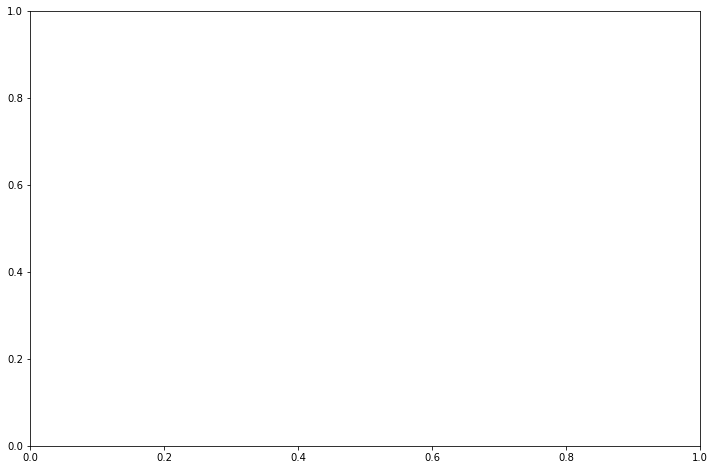

In [12]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(111)
#ax.scatter(rE[0],rE[1],rE[2],marker="o",s=64, label="Earth")
ax1.scatter(rE[0],rE[1],marker="o",s=10**2, label="Earth")
ax1.set(xlabel="X[km]",ylabel="Y[km]")
for k in range(len(Asteroid)):
  #ax.scatter(Asteroid[k][:3][0],Asteroid[k][:3][1],Asteroid[k][:3][2], s=2**2)
  ax1.scatter(Asteroid[k][:3][0],Asteroid[k][:3][1], s=2**2)

plt.legend(fontsize=14)
plt.grid()

In [13]:
#"{:e}".format(abs(np.linalg.norm(Asteroid[0][:3])-np.linalg.norm(Asteroid[1][:3])))
np.std(a/AU)

NameError: name 'a' is not defined